In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
os.chdir('/Users/zoechan/Desktop/blockchain/data_cleaned_extracted/after')
df_24h=pd.read_csv('top_stat_extract/top_stat_24h.csv')
df_30d=pd.read_csv('top_stat_extract/top_stat_30d.csv')
df_7d=pd.read_csv('top_stat_extract/top_stat_7d.csv')
df=pd.concat([df_24h,df_30d,df_7d])

### Data Processing

Categorical variables: 
To process the data, we use the Label Encoding method to convert the categorical variables 'contract_address' and 'name' into numerical labels. 

Missing values: 
We fill in missing values in the DataFrame using the mean value of the rows with the same 'contract_address'. Then, for the remaining missing values, we choose to delete the corresponding rows from the DataFrame. 

Training/test dataset split: 
Selecting 'one_day_average_price' as the target variable for prediction, we then split the data into a training set and a test set using an 80/20 split. 

Standardizztion: 
Fit and transform scalar(z-score normalization method) on X_train and X_test

Features: 
'contract_address', 'name', 'one_day_volume', 'one_day_change', 'one_day_sales', 'seven_day_volume', 'seven_day_change', 'seven_day_sales', 'seven_day_average_price', 'thirty_day_volume', 'thirty_day_change', 'thirty_day_sales', 'thirty_day_average_price', 'total_volume', 'total_sales', 'total_supply', 'total_minted', 'num_owners', 'average_price', 'market_cap', 'floor_price', 'floor_price_historic_one_day', 'floor_price_historic_seven_day', 'floor_price_historic_thirty_day', 'updated_date'

In [2]:
X = df.drop(columns=['updated_date'])
# use Label Encoding method to convert categorical variables
X['contract_address']=LabelEncoder().fit_transform(X['contract_address'])
X['name']=LabelEncoder().fit_transform(X['name'])

In [3]:
# fill in missing value with mean of the same contract_address
for col in X.columns:
    if X[col].isnull().sum() > 0:
        X[col] = X.groupby('contract_address')[col].transform(lambda x: x.fillna(x.mean()))
X=X.dropna()

In [4]:
# Split x and y
y = X['one_day_average_price'].to_numpy()
y = y.reshape(y.shape[0],1)
X =X.drop(columns=['one_day_average_price'])
# Split train and test dataset
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [5]:
# Fit and transform scalar on X_train and X_test
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)   
X_test = scaler.transform(X_test)           
# Add a column of ones to the feature metrices
# X_train = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
# X_test = np.hstack([np.ones((X_test.shape[0], 1)), X_test])

### Modelling

Model selection:
To predict the 'one_day_average_price' for each contract, we applied the neural network method to build a model. Although the dataset for this project is not very large, neural networks can still work well with smaller datasets if proper regularization techniques are applied to prevent overfitting. Using a neural network for regression problems offers the advantages of flexibility, scalability, and the ability to model complex non-linear relationships between the input features and the target variable.

Adjust paremeters: Based on the results of our experimentation using grip research, we adjusted the parameters 'hidden_layer_sizes', 'alpha', and 'learning_rate_init' in order to find the combination that produced the best training results. We then trained the neural network model, called best_mlp, using these optimal parameter values.


Evaluation models:
To evaluate the models, we calculated the MSE and R-squared values for both the training set and the test set. The MSE values for the training and test sets were 0.0106 and 0.0488, respectively. The R-squared values for the training and test sets were 0.9999 and 0.9995, respectively.The small MSE values and the R-squared values close to 1 indicate that the model has performed very well and has accurately predicted the target variable.

### Conlusion1

NFT price prediction: Considering the MSE and R-squared values,we can conclude that the neural network model we trained using the optimal parameter values obtained from grid research has excellent performance in predicting the 'one_day_average_price' for each contract.

In [6]:
#construct neural network model and use grid search to find best parameters
mlp = MLPRegressor(random_state=42)
param_grid = {
    'hidden_layer_sizes': [(10,), (20,), (30,),(10,2), (20,2), (30,2)],
    'alpha': [0.001, 0.01, 0.1],
    'learning_rate_init': [0.001, 0.01, 0.1]
}
grid_search = GridSearchCV(mlp, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
# train model with best parameters
best_mlp = MLPRegressor(random_state=42, **grid_search.best_params_)
best_mlp.fit(X_train, y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: 

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y 

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using rave

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization h

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using rave

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using rave

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using rave

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using rave

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.1,
             random_state=42)

In [7]:
# use mse and R square to evaluate models
y_train_pred = best_mlp.predict(X_train)
y_test_pred = best_mlp.predict(X_test)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print("MSE for training set: ",round(mse_train,4))
print("MSE for test set: ",round(mse_test,4))
print("R square for training set: ",round(r2_train,4))
print("R square test set: ",round(r2_test,4))

MSE for training set:  0.0106
MSE for test set:  0.0488
R square for training set:  0.9999
R square test set:  0.9995


### Feature importance
According to the feature importance ranking obtained from the ten-fold permutation validation, we have identified the following order of feature importance. By analyzing the feature importance, we have discovered methods for identifying NFTs with value-added potential.

### Conlusion2
1.The features 'thirty_day_average_price', 'seven_day_average_price', 'average_price', 'thirty_day_volume', 'thirty_day_change', and 'floor_price_historic_thirty_day' have the greatest impact on the price of a series of NFTs.

2.NFT series with a thirty-day average price higher than the seven-day average price have the potential to appreciate in value, especially those with prices higher than the historical average price, high trading volume, and significant price changes in the last thirty days. These are worth considering for investment.

[0.00012182 0.00013284 0.00056021 0.00060454 0.0006074  0.00065428
 0.00077582 0.00096673 0.00107837 0.00221481 0.00269304 0.00369244
 0.00592162 0.00619088 0.00701622 0.00745477 0.01503798 0.0164005
 0.03676156 0.03718142 0.04052977 0.04482619 0.06256485 0.06871042]


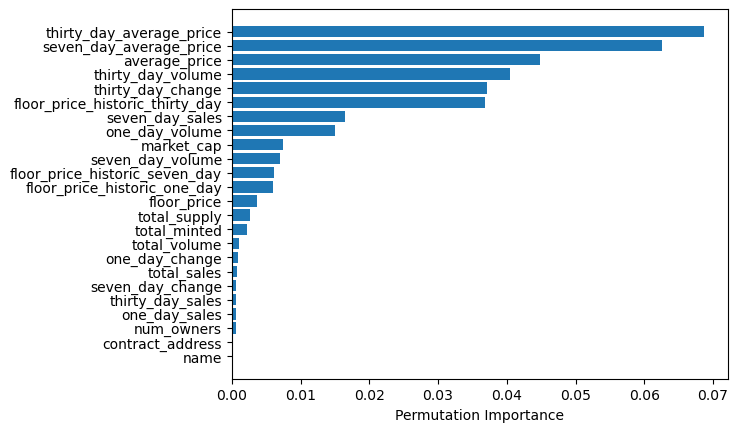

In [8]:
# rank feature importance
result = permutation_importance(best_mlp, X_train, y_train, n_repeats=10, random_state=16)
sorted_idx = result.importances_mean.argsort()
plt.barh(range(X_train.shape[1]), result.importances_mean[sorted_idx])
print(result.importances_mean[sorted_idx])
plt.yticks(range(X_train.shape[1]), X.columns[sorted_idx])
plt.xlabel("Permutation Importance")
plt.show()

### Conclusion 3
The prices of different NFT series minted by different artists can vary greatly. The most popular 6 NFT series are from the artists 'Azuki', 'Wrapped Cryptopunks', 'MutantApeYachtClub', 'BoredApeKennelClub', 'Beanz', and 'PudgyPenguins'. These 6 NFT series are priced much higher, up to even 10 times more, compared to other NFT series.

The top 15 NFT series with the highest thirty_day_average_price are displayed in the table.

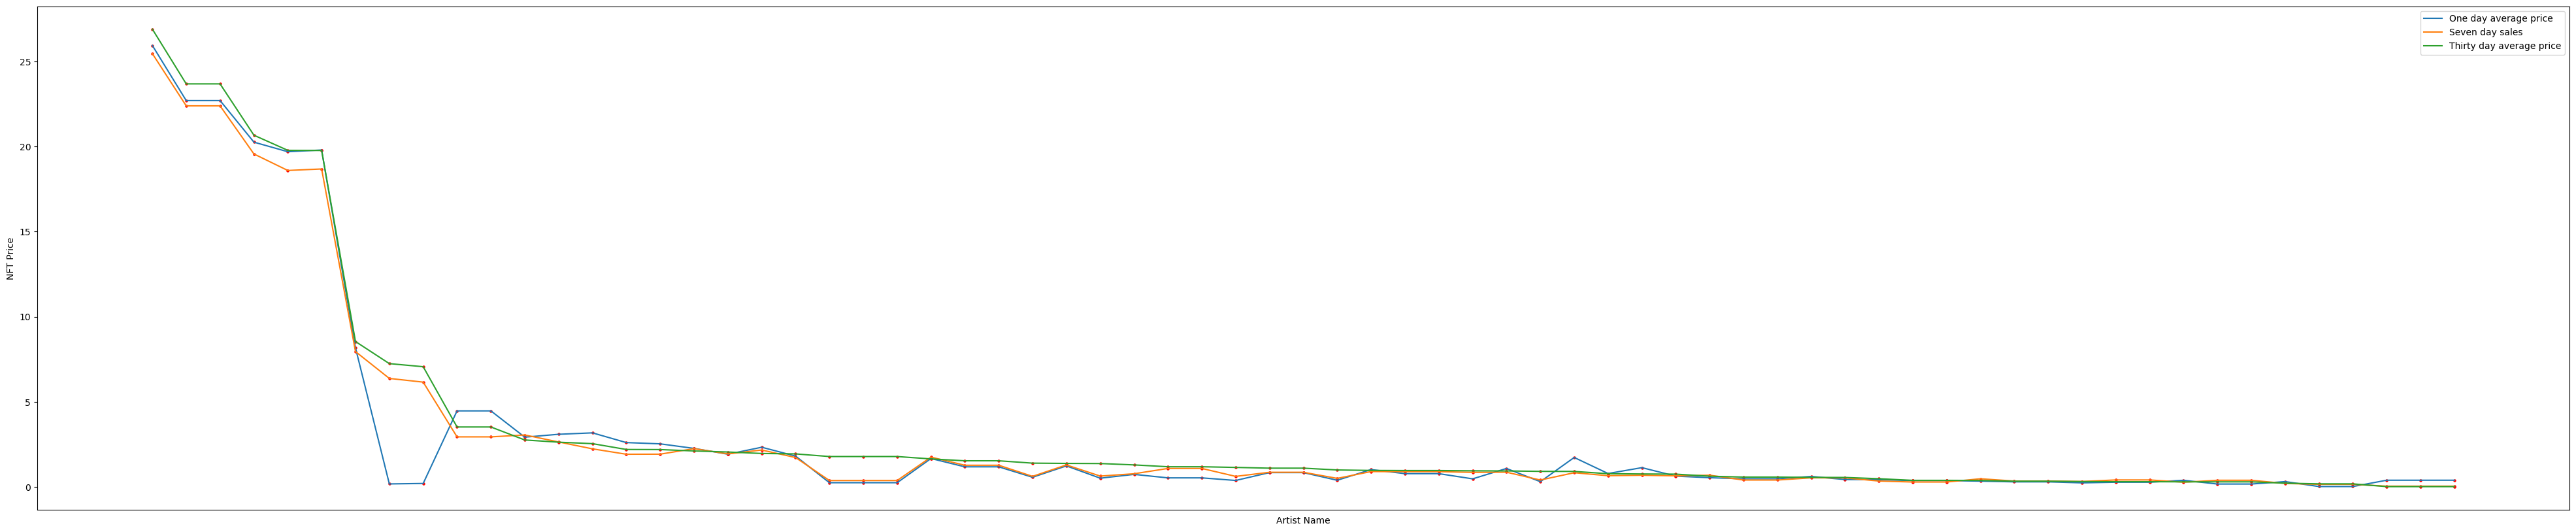

In [9]:
#show the top nft price for different artist
df2=df.groupby('name').mean().sort_values('thirty_day_average_price', ascending=False)
fig = plt.figure(figsize=(50, 10))
plt.plot(df2.index, df2['one_day_average_price'], label='One day average price')
plt.plot(df2.index, df2['seven_day_average_price'], label='Seven day sales')
plt.plot(df2.index, df2['thirty_day_average_price'], label='Thirty day average price')
plt.scatter(df2.index, df2['one_day_average_price'], s=5, color='red', label='')
plt.scatter(df2.index, df2['seven_day_average_price'], s=5, color='red', label='')
plt.scatter(df2.index, df2['thirty_day_average_price'], s=5, color='red', label='')
plt.legend()
plt.xlabel('Artist Name')
plt.ylabel('NFT Price')
plt.xticks([])
plt.show()

In [10]:
# Top 30 artists with high nft thirty_day_average_price
df3 = df2.reset_index()[['name','one_day_average_price','seven_day_average_price','thirty_day_average_price']].head(15)
df3

,name,one_day_average_price,seven_day_average_price,thirty_day_average_price
0,Azuki,25.951447,25.472240,26.911870
1,Wrapped Cryptopunks,22.710144,22.400138,23.692012
2,MutantApeYachtClub,22.710144,22.400138,23.692012
3,BoredApeKennelClub,20.265496,19.570104,20.672733
4,Beanz,19.702313,18.600017,19.784315
5,PudgyPenguins,19.803098,18.688494,19.774501
6,BoredApeYachtClub,8.165408,7.947592,8.539467
7,Sandbox's ASSETs,0.163750,6.368622,7.239723
8,Grails III Mint Pass,0.190917,6.150855,7.057725
9,Consortium Key,4.460000,2.931262,3.513031
